In [3]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# find all npz files in the stx folder
import glob
trajectory_files = glob.glob('stx/*.npz')
print('Found %d trajectory files' % len(trajectory_files))

Found 3 trajectory files


In [13]:
trajectory = np.empty((0, 2, 2000))

In [16]:
for file_name in trajectory_files[1:]:
    trajectory = np.vstack((trajectory, np.load(file_name, allow_pickle=True)['arr_0']))

print('Trajectory shape:', trajectory.shape)

Trajectory shape: (14, 2, 2000)


In [18]:
# cast trajectory to float32
trajectory = trajectory.astype(np.float32)

In [26]:
import numpy as np

def fill_nan_with_avg(arr_ds):
    for first_index in range(arr_ds.shape[0]):
        for second_index in range(arr_ds.shape[1]):
            arr = arr_ds[first_index, second_index, :]
            nans = np.isnan(arr)
            for i in range(len(arr)):
                if nans[i]:
                    left = right = np.nan
                    # Find nearest non-NaN value to the left
                    for j in range(i-1, -1, -1):
                        if not nans[j]:
                            left = arr[j]
                            break
                    
                    # Find nearest non-NaN value to the right
                    for j in range(i+1, len(arr)):
                        if not nans[j]:
                            right = arr[j]
                            break
                    
                    # Calculate average if both neighbors are found
                    if not np.isnan(left) and not np.isnan(right):
                        arr[i] = (left + right) / 2
                    # If only one neighbor, use its value
                    elif not np.isnan(left):
                        arr[i] = left
                    elif not np.isnan(right):
                        arr[i] = right
            arr_ds[first_index, second_index, :] = arr
    return arr_ds


In [27]:
# check if trajectory contains NaNs
trajectory = fill_nan_with_avg(trajectory)

In [28]:
# Compte the distance matrix
dist = euclidean_distances(trajectory.reshape(trajectory.shape[0], -1))

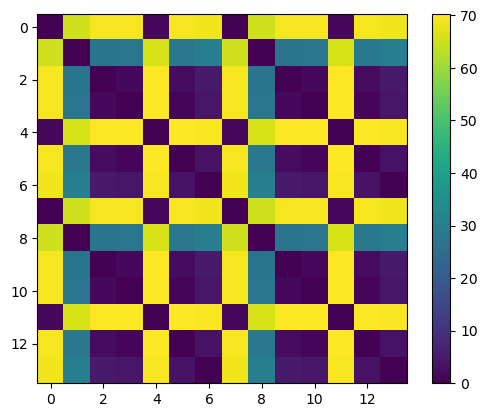

In [30]:
plt.imshow(dist)
plt.colorbar()

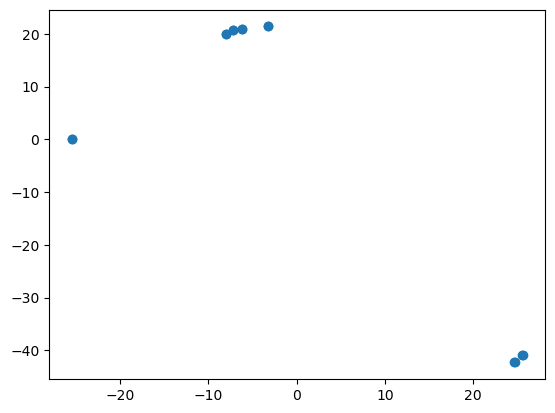

In [31]:
# Compute the MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
pos = mds.fit_transform(dist)

# Plot the MDS
plt.scatter(pos[:, 0], pos[:, 1])